# Signal Detection Theory and psychophysical mappings

In [1]:
using Distributions
using LaTeXStrings
using Plots
using QuadGK

false

## Signal Detection Theory
Signal detection theory is one of the standard models in psychophysics. It assumes that perceptual decisions are formed on an internal decision axis, which is monotonic with the likelihood ratio that a sensory event was caused by a signal rather than noise. SDT does not make statements about the source of the noise, i.e. whether the noise is external (in the stimulus itself) or internal (neuronal). In its most basic form, it is merely concerned with response probabilities (hits and false alarms) conditional on the presented stimuli, which can be succinctly summarized with an ROC curve. This can be done without assuming a specific parametric form of the noise and signal distributions. One common assumption that extends this basic framework is the Gaussian assumption with equal variance. The Gaussian assumption has been theoretically justified on grounds of the central limit theorem, with several independent sources of noise tending towards Gaussian. More importantly, however, the assumption has practical reasons, since it allows straightforward computation of certain results, such as the sensitivity index $d'$ (see below). The actual physical stimulus values presented to the subject are not considered in this type of analysis. The parameter $d'$, which characterizes the difference in the means of the Gaussian distributions on the internal decision axis, can be calculated solely from the the hit and false alarm probabilities. The question is: how far would two Gaussian distributions with equal variance be separated in order to yield the observed responses?

Figure 1: The internal decision axis in SDT. $d' = \frac{(\mu_2 - \mu_1)}{\sigma}$, where the $\mu_i$ are the means of the noise and signal distributions and $\sigma$ is their common standard deviation.

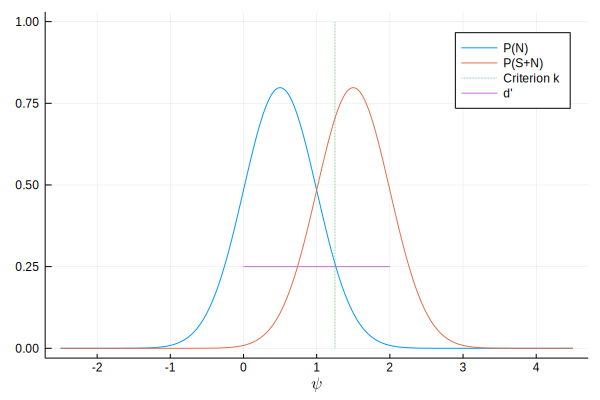

In [10]:
# psychological decision variable
ψ = collect(-2.5:0.02:4.5)

# fix SDT parameters d' and a criterion k for illustration purposes
μ1 = 0.5
μ2 = 1.5
σ = .5
n = Normal(μ1, σ)
s = Normal(μ2, σ)
dprime = (μ2 - μ1) / σ
k = 1.25

# plot
plot(ψ, pdf.(n, ψ), label="P(N)", xlabel=L"\psi")
plot!(ψ, pdf.(s, ψ), label="P(S+N)")
#xticks([μ1, μ2], [0, "d'"])
plot!([k, k], [0, 1], label="Criterion k", linestyle=:dot)
plot!([0, 2], [0.25, 0.25], label="d'")

## Psychophysical mappings
The absence of the actual physical stimulus properties apart from the identity of the presented stimulus (noise or signal) is perhaps surprising, since a major goal in psychophysics is to build a functional relationship between physical and psychological measurements. SDT does not depend on a specific form of this psychophysical mapping. As long as there exists a mapping, for which the assumptions of SDT (Gaussian noise with equal variance) hold, it tells us how well two stimuli can be discriminated and lets us infer their separation on the assumed internal decision axis.

If we additionally want to make statements about the relationship of physical stimulus properties and responses, e.g. in the form of a psychometric curve, we have to make (explicit or implicit) assumptions about the shape of the psychophysical mapping.

In [89]:
function plot_mapping(mapping, x; title="", μ1=1.5, μ2=2.5, σ=0.5)
    
    # compute transformation from physical to psychological space
    y = mapping.(x)
    
    # compute transformation from physical to psychological space
    y = mapping.(x)

    l = @layout [a{0.1w} b{0.9w, 0.9h}
                 c{0.1w} d{0.9w}]

    # signal and noise distributions on the internal axis
    noise = Normal(μ1, σ)
    signal = Normal(μ2, σ)

    # plot the mapping
    p2 = plot(x, y, color=3, ticks=false, axis=false, label="", title=title)

    p1 = plot(pdf.(noise, y), y, xflip=true, ticks=false, axis=false, label="")
    plot!(pdf.(signal, y), y, label="")

    p3 = plot(ticks=false, axis=false, label="")

    p4 = plot(x, pdf.(noise, y) / sum(pdf.(noise, y)), yflip=true, ticks=false, axis=false, label="")
    plot!(x, pdf.(signal, y)/ sum(pdf.(signal, y)), label="")


    p = plot(p1, p2, p3, p4, layout=l)
    return p
end;

For example, imagine we analyze data from a contrast discrimination task under the assumption that decisions are made on an internal axis with Gaussian noise distribtions and that contrast perception scales with Fechner's law. In that case, the internal decision variable $\psi$ depends logarithmically on the physical variable $\phi$: $\psi = \ln{\varphi}.$ If we now make the standard assumption (as in SDT) that $\psi \sim \mathcal{N}(\mu, \sigma^2)$, it follows from the definition of the log-normal distribution that $\varphi \sim \text{Lognormal}(\mu, \sigma^2)$

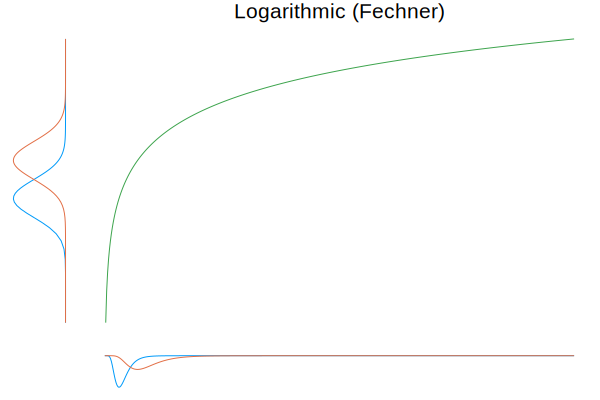

In [90]:
fechner_law(x) = 1.2 * log(x) + 1

ϕ = collect(0:0.1:50)

f = plot_mapping(fechner_law, ϕ, title="Logarithmic (Fechner)")

This has implications for the interpretation of the standard practice of fitting psychometric functions. If we fit a cumulative Gaussian to the reponse probabilities from a psychophysical experiment at different physical levels of stimulus intensity, we can interpret this as an implicit assumption that the psychophysical mapping is linear and that the internal decision axis has equal Gaussian noise everywhere.

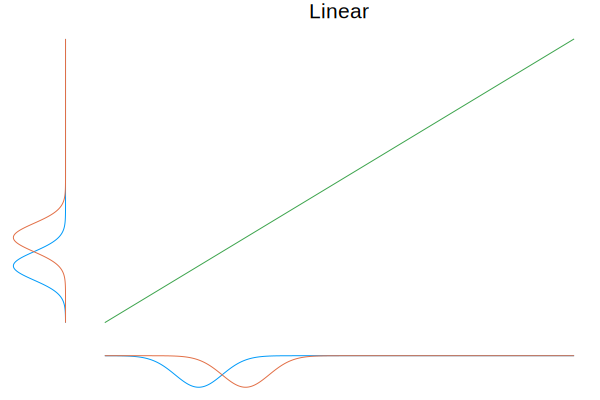

In [91]:
linear(x) = 0.2 * x - 0.5

ϕ = collect(0:0.01:50)

f = plot_mapping(linear, ϕ, title="Linear")

Another popular candidate psychophysical law is Stevens' power law, which poses that subjective intensities are a power function of the physical stimulus $\psi = \varphi^\alpha$. For certain choices of the exponent $\alpha$, this is barely distinguishable from Fechner's law. To my knowledge, there is no closed-form description of the distributions that arise on the physical axis.

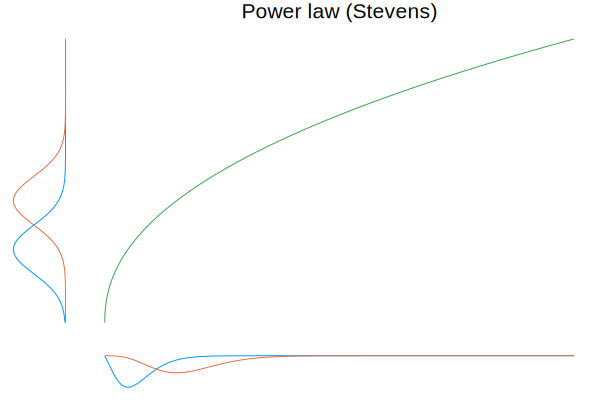

In [92]:
power(x) = x^0.45

ϕ = collect(0:0.01:50)

f = plot_mapping(power, ϕ, title="Power law (Stevens)")

## Efficient coding
Recent work in the context of efficient coding (Ganguli & Simoncelli; Wei & Stocker) can be interpreted as an alternative psychophysical law, whose shape is the cumulative distribution function (CDF) of the stimulus distribution in the natural environment. In this section, I illustrate the link between SDT, the above-mentioned psychophysical laws and efficient coding.

The efficient coding hypothesis posits that sensory representations under resource constraints are adapted to the statistics of their natural input. This is often formalized in information-theoretic terms as maximizing the mutual information between a stimulus variable and its sensory representation. Laughlin (1981) showed that a single neuron should encode a stimulus, which occurs with probability $p(\varphi)$, using its CDF $F(\varphi) = \int_{-\infty}^{\varphi} p(x) dx$. 

More recently, Ganguli & Simoncelli (2014) and Wei & Stocker (2015) have employed this idea by maximizing Fisher information of a sensory representation, which can be used as an approximation to mutual information (under certain assumptions, see Brunel & Nadal, 1998). The central prediction remains that the mapping from physical stimuli to the sensory space is the CDF of the stimulus distribution.

For many variables, whose environmental distributions roughly follow a $p(\varphi) \propto 1 / \varphi$ shape (an improper prior, since it does not integrate to 1), the predictions are well in agreement with Fechner's law, since in this case $F(\varphi) \propto \ln(\varphi)$. 


As a more concrete example, according to the data presented by Ganguli & Simoncelli (2016), the empirical distributions of spatial frequency in natural images can be well fit by a modified power law function $p(x) = \frac{A}{(x_0^b + x^b)}$. The figure below shows the CDF of the environmental distribution along with predictions of the noise distributions on the physical axis, again assuming Gaussian noise on the internal decision axis. The shape of this mapping is quite similar to the power law (Stevens) case.

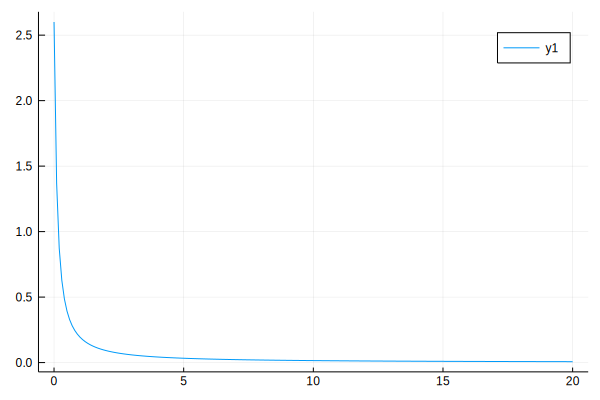

In [93]:
A = 0.21; x0 = 0.11; b = 1.14

function p(x)::Float64
    return A / (x0^b + x^b)
end

ϕ = collect(0:0.1:20)

plot(ϕ, p.(ϕ))

If we compute the cumulative distribution of the stimulus variable by integrating $d(x)$, we again get a power law shape.

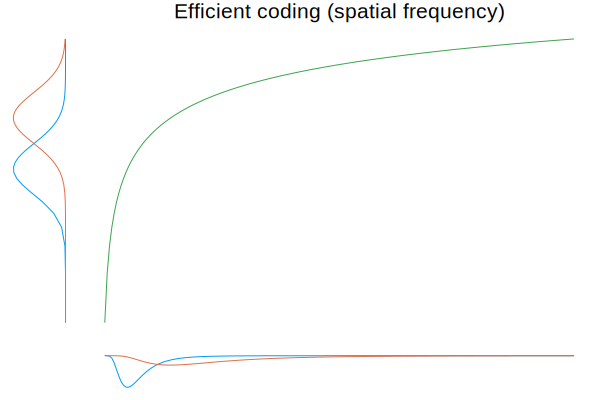

In [94]:
function F(x)
    integral, err = quadgk(p, 0, x, rtol=1e-8)
    return integral
end

f = plot_mapping(F, ϕ, μ1=0.6, μ2=0.8, σ=0.1, title="Efficient coding (spatial frequency)")

 For other variables, where neither the logarithmic nor power-law shape hold, the efficient coding theories provide an alternative explanation. The empirical distribution of edge orientations in natural images has sharp peaks at the oblique orientations and can be summarized as $d(x) = c \, (\frac{1}{c} - |\sqrt{\sin{x}}|)$. The mapping from physical to internal sensory space is given by the CDF of this distribution.

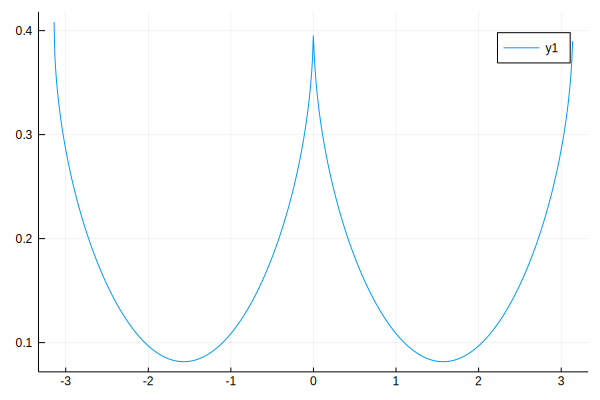

In [96]:
c = 0.8

p_u(x) = c * ((1 / c) - abs(sqrt(Complex(sin(x)))))

normconst = quadgk(p_u, -pi, pi, rtol=1e-8)[1]
p(x) = p_u(x) ./ normconst

ϕ = collect(-pi:0.01:pi)

plot(ϕ, p.(ϕ))

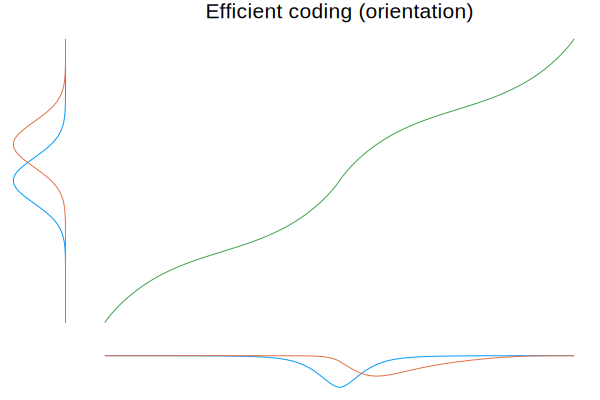

In [97]:
function F(x)
    integral, err = quadgk(p, -pi, x, rtol=1e-8)
    return (2 * pi * integral) - pi
end

f = plot_mapping(F, ϕ, μ1=0, μ2=0.8, σ=0.5, title="Efficient coding (orientation)")



### Discriminability

The efficient coding theories also make predictions about discriminability of the stimuli based on the mapping from physical to sensory space. Their argument goes via the Cramer-Rao bound, which provides a lower bound on discriminability based on Fisher information. Alternatively, one can assume that the noise on the internal axis is Gaussian and has equal variance everywhere (as one does in SDT), and that the discriminability $d_\psi$ on the internal axis is constant. Our goal is now to find the discriminability $d(\varphi_0)$ at a position $\varphi_0$ on the physical axis based on these assumptions. We start with the equation for $d'$, which we write in terms of two physical stimulus values $(\varphi_1, \varphi_2) = (\varphi_0 - d(\varphi_0) / 2, \varphi_0 + d(\varphi_0) / 2)$

We assume that the discriminability $\delta$ in the sensory representation is constant. From this assumption and the mapping from physical to sensory space, we can derive the discriminability in physical space. Under the Gaussian assumption with equal variance it follows that the discriminability at a particular position $\psi_0$ is

 \begin{align}
     d_\psi = \frac{F(\varphi_2) - F(\varphi_1)}{\sqrt{(\sigma^2(\varphi_2) + \sigma^2(\varphi_1))/2}},
 \end{align}
 
 which simplifies due to our equal variance assumption to
 
 \begin{align}
     d_\psi = F(\varphi_0 + d(\varphi_0) / 2) - F(\varphi_0 - d(\varphi_0) / 2).
 \end{align}
 
 Using a first order Taylor approximation (i.e. approximating $F$ as locally linear), we get
 
 \begin{align}
    d_\psi = F(\varphi_0) + \frac{d(\varphi_0)}{2} F'(\varphi_0) - F(\varphi_0) + \frac{d(\varphi_0)}{2} F'(\varphi_0) = d(\varphi_0) \, F'(\varphi_0) = d(\varphi_0) \, p(\varphi_0).
 \end{align}
 
 This means that the discriminability is proportional to the inverse of the environmental distribution:
 
 \begin{align}
    d(\varphi_0) \propto \frac{1}{p(\varphi_0)}.
 \end{align}
 


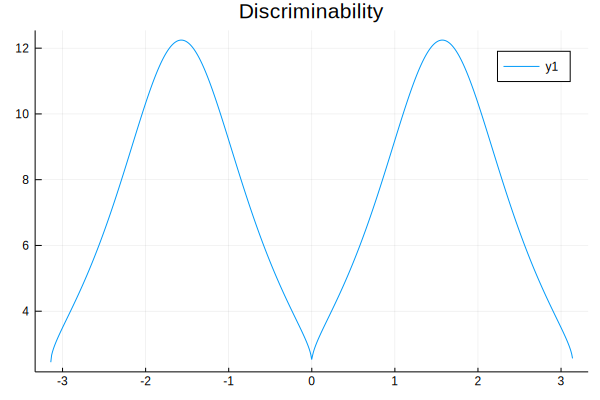

In [99]:
plot(ϕ, 1 ./ p.(ϕ), title="Discriminability")

Note: In the case of $p(\varphi) = 1 / \varphi$, which we considered above, this amounts to Weber-law discrminability $d(\varphi) \propto \varphi$.
